#### Applications
- Text Summarization, Question Answering, Text Classification, Sentiment Analysis, Sentence Completion

#### Mean Contribution
1. **Text-to-Text** format, add task-specific prefix before the sequence as hyperparameter
2. leverage a unified approach to transfer learning,providing a standard testbed with the same model/hyper parameters/loss function
3. Make multi-task of NLP commonly, simultaneously track all the tasks at once.

#### Dataset
- **Colossal Clean Crawled Corpus (C4)**: unlabeled data
- seven steps of text cleaning processes
- Filter Input language: English
- magnitude larger than most normal datasets
- highlight the *ambiguous pronoun* in text passage and ask model to predict the noun it refers to, with T/F label show whether the candidate noun matches the pronoun. Only use words with True label when training.

#### Downstream Tasks
- Categories:

> Sentence acceptability judgement, sentence analysis, Sentence similarity, Natural language inference, coreference resolution, sentence completion, Question answering, work sense disambiguating


- Benchmark:
   - GLUE/SuperGLUE: text classification
   - CNN/Daily Mail: summarization
   - SQnAD: Question answering
   - WMT14 EnDe, WMT14 EnFr, and WMT14 EnRo: English to Germay/French/Romanian translation

#### Model
- Relative Position Embedding
   - the offset between the key and query, instead of using a fixed embedding position embeddings
   - Simplify the embedding as a scalar added to logit for getting attention weights

- Model is built based on encoder-decoder *Transformer* which is good for text classification and generation tasks performance, there exists some differences:
   - removing layer normalization bias
   - place layer norm outside residual path
   - have different position embedding pattern

- Unsupervised Objective: use `MLM` denoising objectives, drop out 15% of total length of the sentence.
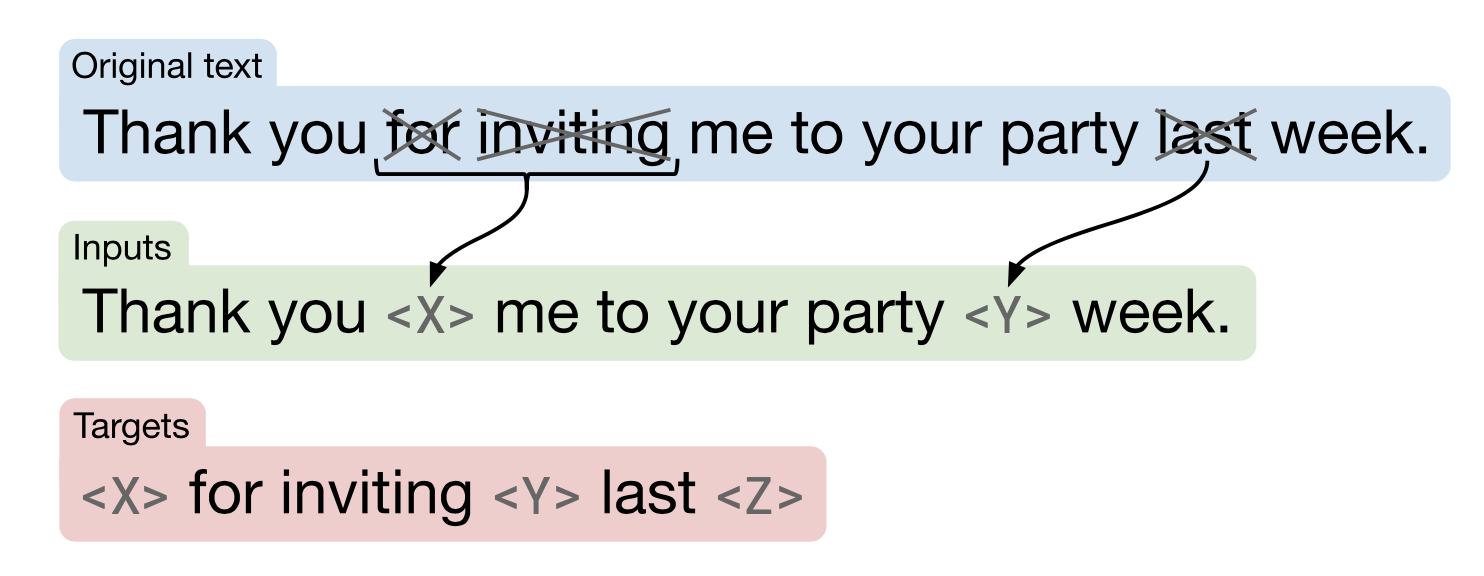

- Model Structure:

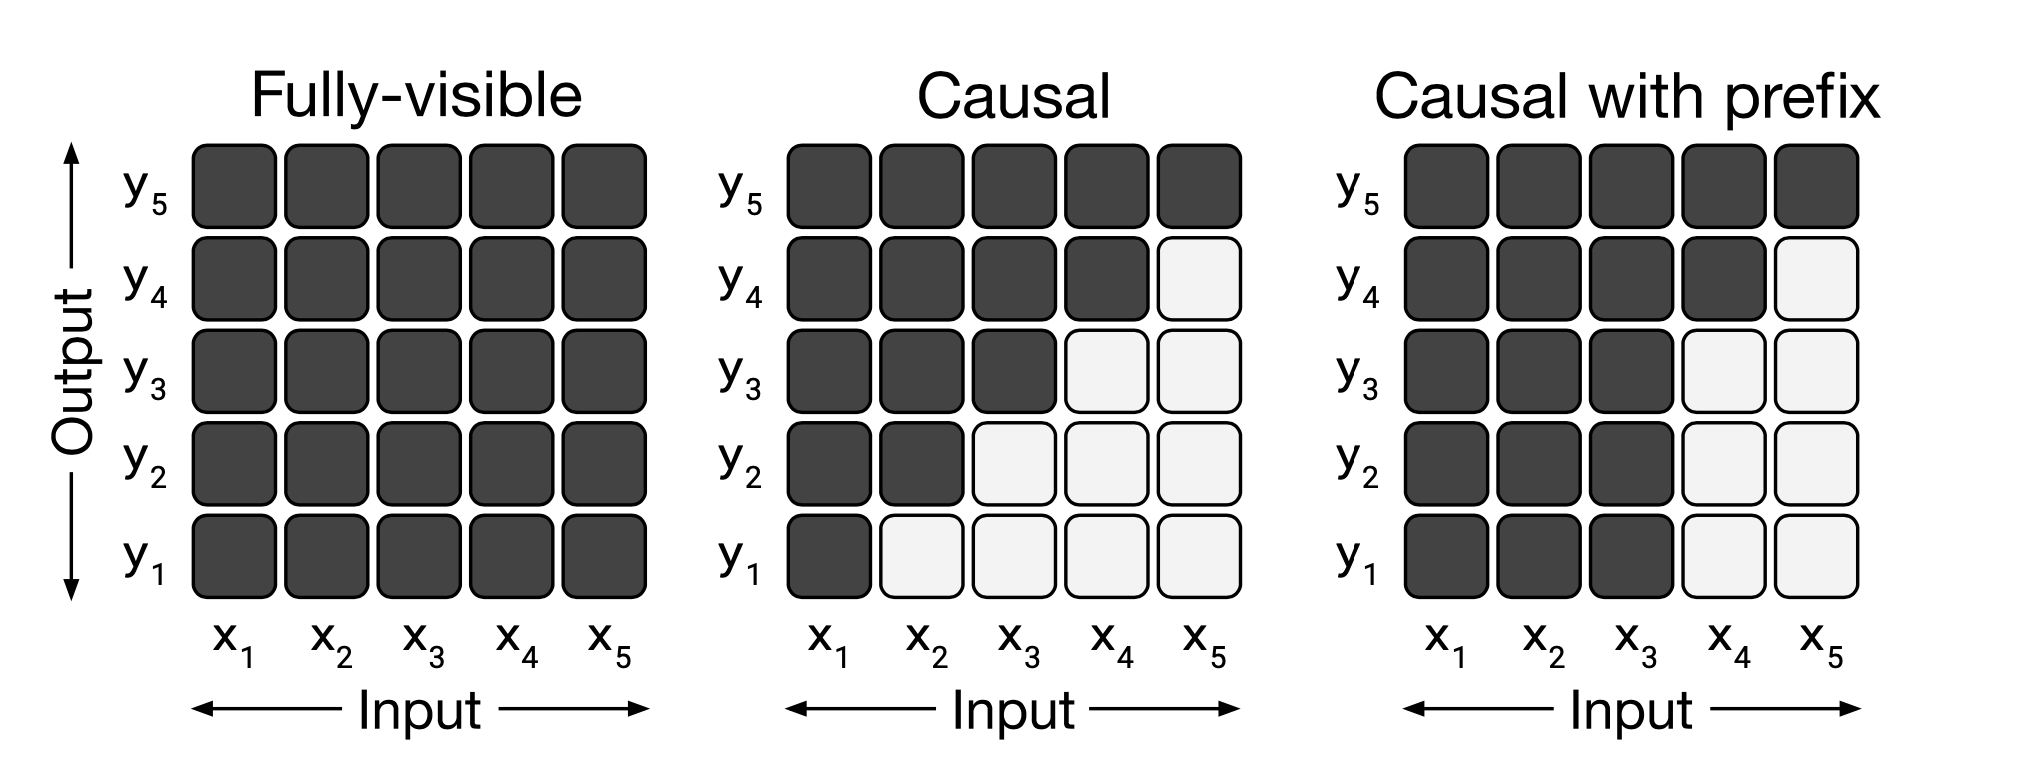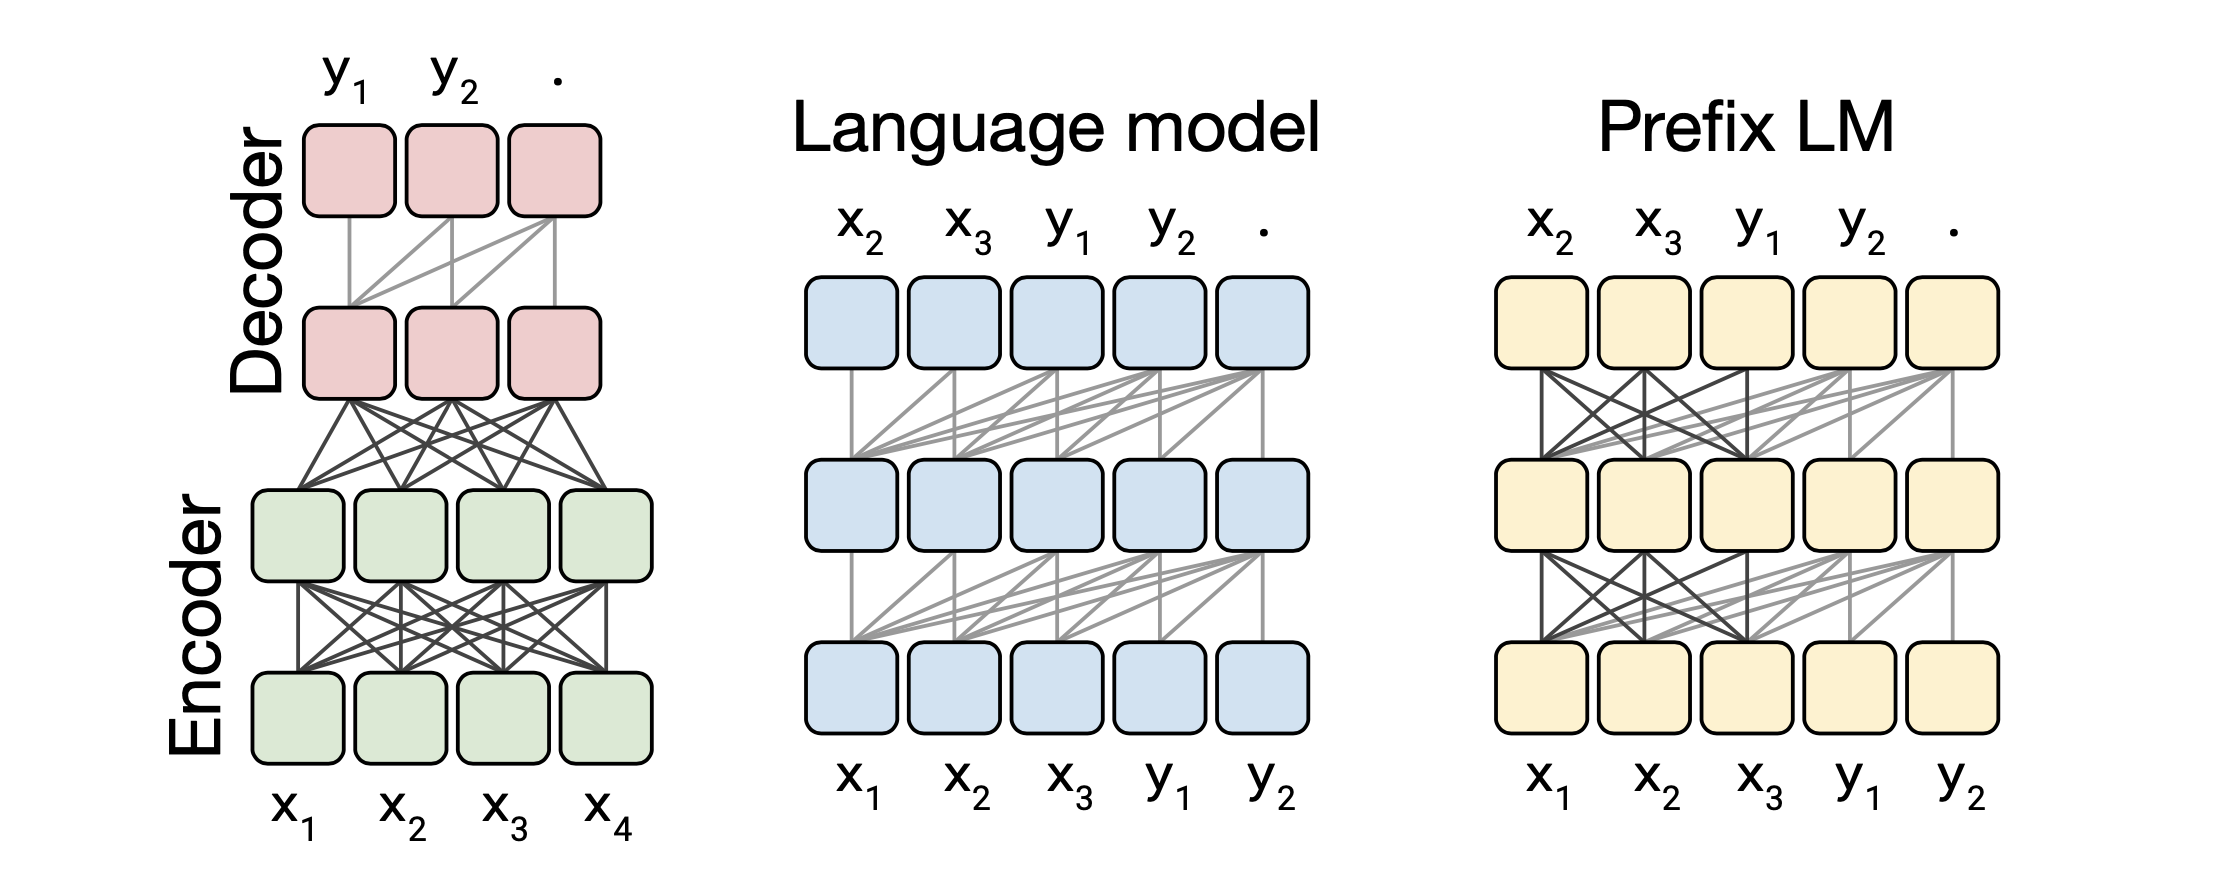

There are several **mask patterns&self-attention**:
   - left: a **fully visible** mask allows self-attention to attend the input at every output timestep.
   - Middle: a casual mask that is good for predicting a sequence, cuz the model is not allowed to look into the future to predict.(GPT, CTRL)
   - Right: Casual mask+prefix, look at the first bit of the input sequence with full visuality, starts predicting what comes next later.(UniLM)Satisfy translation task.

Notion: 
- yi: ith element of output sequence
    - yi=𝛴wi,j*xj
    - When it is masked(light part), set wi==0
- xj: jth entry of input sequence
- Lines: attention visibility
   - Dark grey: fully-visible masking
   - light grey: casual masking
- Blocks: elements of sequence
- · ：end of prediction

Result:
The encoder-decoder performances best.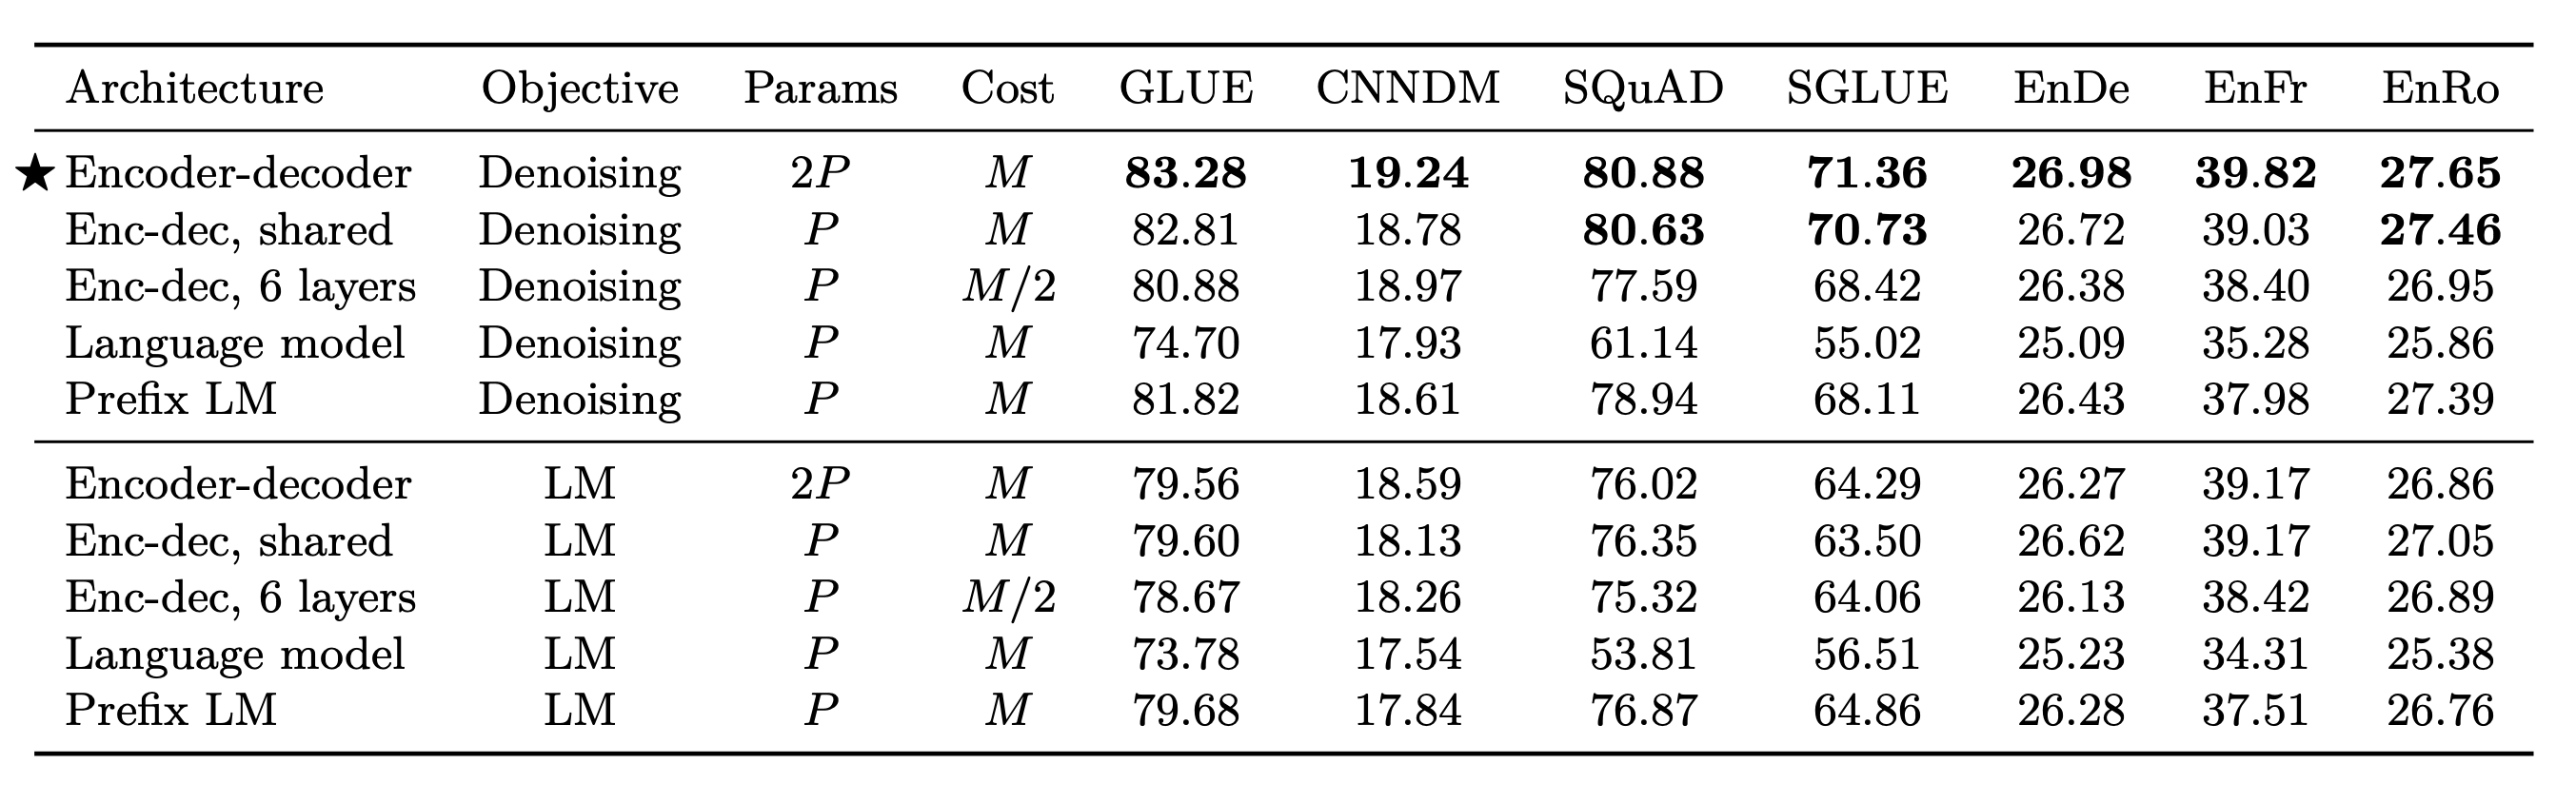

### Objectives
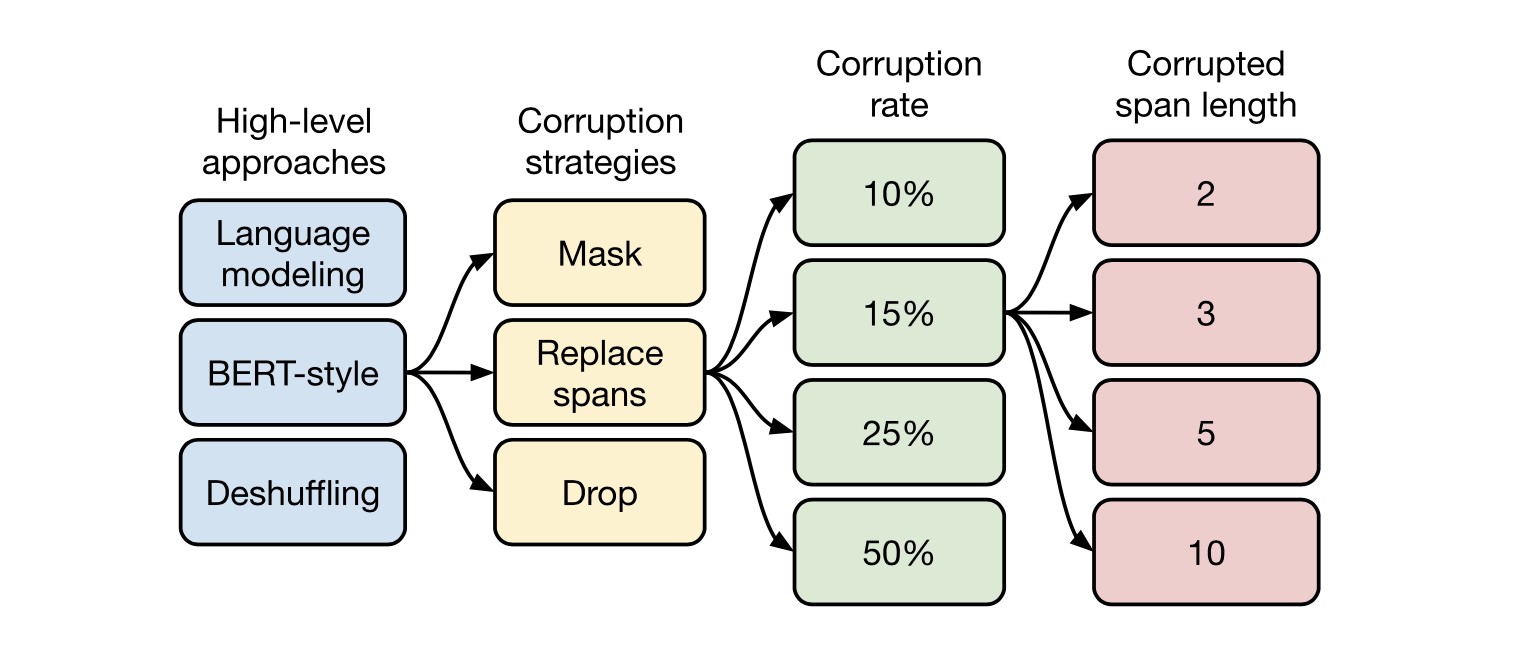

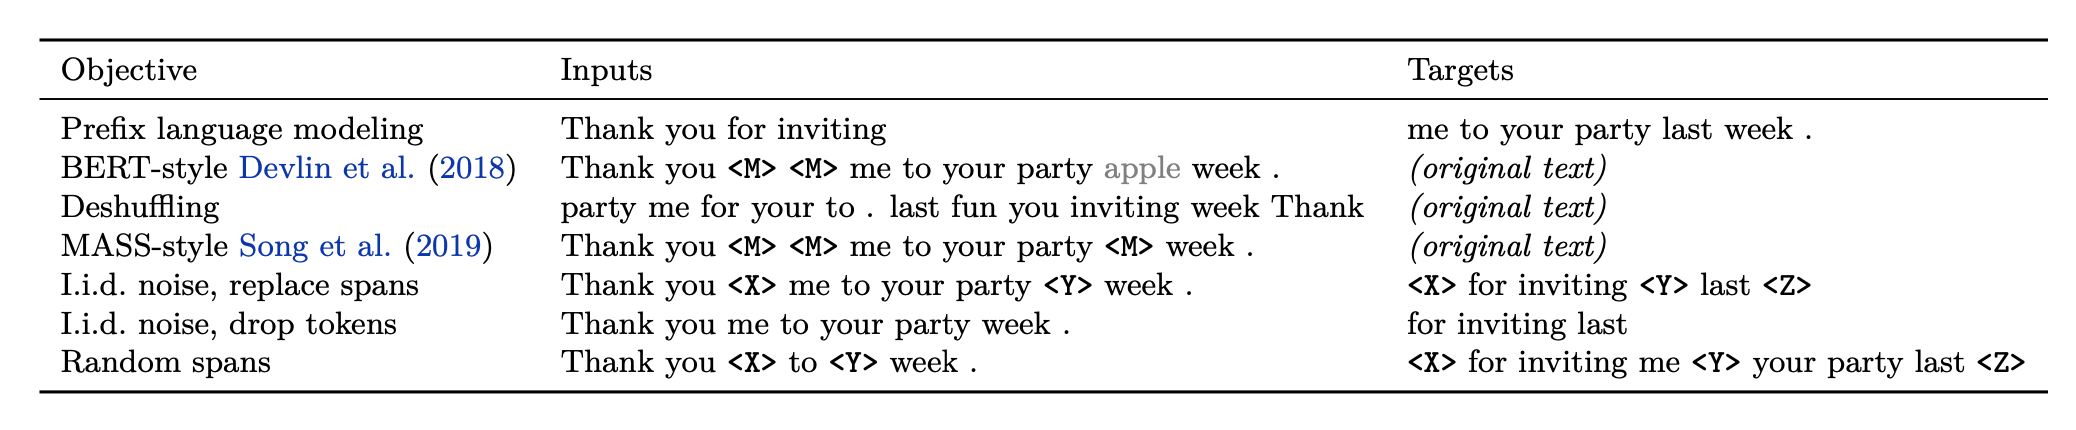


- Disparate High-level Approaches
1. Prefix LM: predict from left to right
2. BERT-Style: corrupts some part, then predict the original sentence.
3. Deshuffling: disorder the input, target is to get corrent order of original sentence.
   - **BERT-Style** performs best in benchmark tasks.
- Corrupted Approach
1. Mask: replace corrupted spans with [M]
2. Replace corrupted spans: replace with sentinel tokens that are assigned unique token IDs <X> <Y> <Z>
3. Drop corrupted tokens
     - **Replace-style** performs best in benchmark tasks.
- Choose the Corruption rate: BERT with 15% ✅
- Choose Replace Span: 3 ✅

## Conclusion of T5 Model Structure:
- Decoder-Encoder Transformer
- Bert-style corruption approach
- Replace Span corruption stategy
- Corruption rate=15%
- Replace span=3

## Further Issues
- Scaling effect is vaild. Larger model, larger data, more parameters in model, more steps in pre-training and fine-tuning are reasonable.
- Model size:
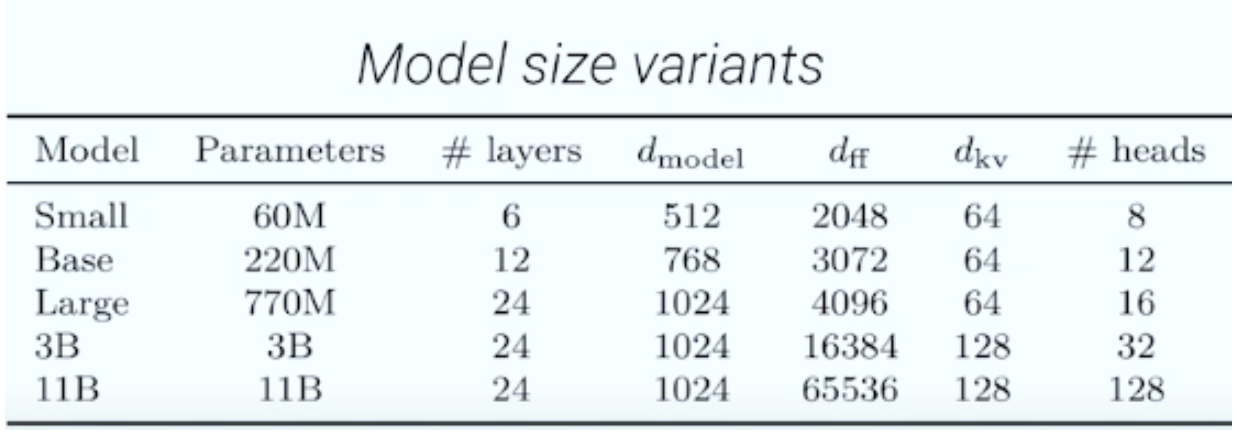

- Dataset:
Using a *smaller data set size* results in smaller training loss values, the model can start to memorize pertaining dataset, which will perform worse in benchmark tasks.
- Multi-task Learning: train a single model with separate parameters on multiple tasks at a time.
   - if it mixed reasonable, the performance scores are similar to baseline one.
   - Method:
      - Example-proportional mixing (K)
      - Temperature-proportional mixing (T)
      - Equal-mixing

## Transfer Learning in NLP
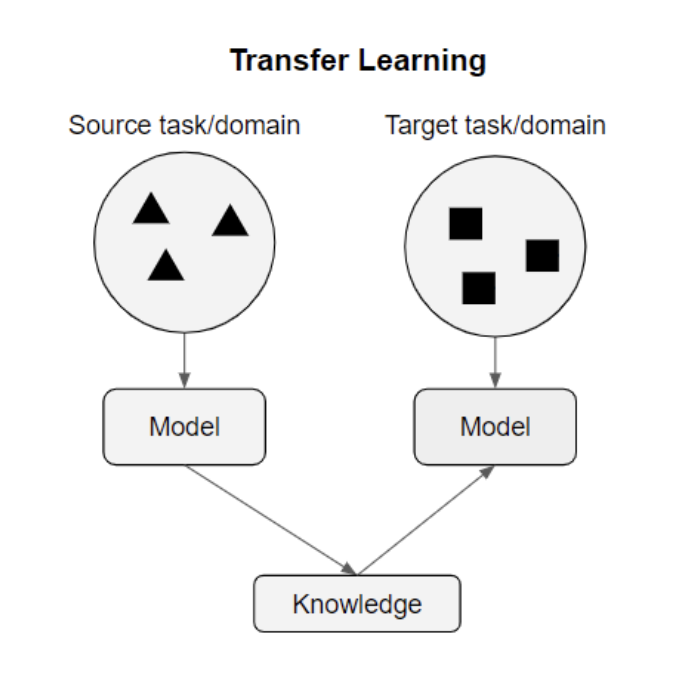

- learning of a task by using the existing labeled data of some related tasks or domains.
- Intuition: find the **similarity** between what are given and what we will get 
    - Method to find similarity-- Domain Adaptation
      1. Representation approaches
       - Distribution similarity approaches: make the source and target data distribution similar
         - Ignore features that do not occur in the target.
         -  **minimizes the distance** between the representations of the two domains
           - [Kullback-Leibler (KL) divergence](https://zh.wikipedia.org/zh-cn/%E7%9B%B8%E5%AF%B9%E7%86%B5)
           - [Jensen-Shannon (JS) divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence)
           - [Wasserstein distance](https://zh.wikipedia.org/zh-cn/%E6%B2%83%E7%91%9F%E6%96%AF%E5%9D%A6%E5%BA%A6%E9%87%8F)
         - Latent feature learning: improve the similarity performance in lower dimensional space
      2. Weighting and selecting data: 
         - weight(soft selection) and select(hard selection) instances

- Terminology 
   - Tasks are the objects of the model.
   - Domain: 
     - Source domain & Target domain: with features and features distribution
- Classification:
1.    - Homogeneous TL: **D**s = **D**t, have the same feature space
   - Heterogeneous TL: **D**s != **D**t

2.  - Inductive TL: *tasks* of source and target domain are different
       - Multi-task learning
    - Transductive TL: source *domain* is different from target domain, with the same task
    - Unsupervised TL: both of domains are unlabeled

3.  - Instance based TL: weighted
    - Feature based TL: transfer the feature into the same space
    - Parameter based TL: share the same parameters from source and target domain
    - Relation based TL: sample logic relationships


In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 12.8 MB/s 


In [2]:
!pip install transformers==3.4.0
!pip install torch==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 15.9 MB/s 
     |████████████████████████████████| 880 kB 68.5 MB/s 
     |████████████████████████████████| 2.9 MB 56.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4e64ca22fc4185a7ba1a857a199894783a463c2db69669ea400cc569b6813843
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.8 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [3]:
display_architecture=True

In [4]:
import torch
import json
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
#set up the T5 model and Tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-large')
T5 = T5ForConditionalGeneration.from_pretrained('t5-large')

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

In [6]:
#print the model architecture
if display_architecture==True:
 print(T5.config)

T5Config {
  "_name_or_path": "t5-large",
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {
      "early_stopping": true,
      "max_length": 300,
 

In [7]:
if(display_architecture==True):
  print(T5)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (

In [8]:
if display_architecture==True:
  print(T5.forward)

<bound method T5ForConditionalGeneration.forward of T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=

In [9]:
#setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
#define a text summarization function
def sum(text,maxlength):
  preprocess_text=text.strip().replace('\n','') #replace the end/start part with space
  t5_prepared_Text = "sum: "+preprocess_text
  print ("Preprocessed and prepared text: \n", t5_prepared_Text)
  tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

  summary_ids = T5.generate(tokenized_text,
                            num_beams=4,
                            no_repeat_ngram_size=2,
                            min_length=30,
                            max_length=maxlength,
                            early_stopping=True)

  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return output

In [34]:
#Application
text="""
The analysis of May CPS data show an uptick in employment that likely derives from the business reopenings implemented in most states during that month. Although rates of recent un- employment and absence from work are still very high in the May CPS data, they data do suggest that reopening policies reduced the negative impact of the epidemic on the labor market. The improvements in labor market outcomes are consistent with cell signal data, which show a rise in physical mobility starting in mid-April and continuing through May (Nguyen et al. 2020). Of course, it is unclear whether these returns to normalcy can be sustained in the face of more recent increases in COVID-19 cases and hospitalizations.
In the meantime, our results highlight that there are large disparities in the current labor market crisis, and they suggest a role for targeted public policies. Although women with young children do not have statistically larger increases in recent unemployment compared to men with young children, despite the disruptions in school and child care, their higher rate of “employed but absent” is worrying and could indicate larger losses in future employment. Moreover, single parents, who are overwhelmingly women, experienced a larger decrease in employment between February and April or and February and May than their married counterparts. Efforts to support new child care options are important in this setting. In May, we found some evidence of racial disparities in the decline in recent unemployment. For example, Black workers seem to have experienced a smaller decline in recent unemployment during the reopening phase and this pattern is not clearly related to any of the individual or job characteristics we considered.
Our results point at deeper structural damage to the economy. Previous research documents large scarring effects of graduating from high school and college during a recession, and the longer term effects of early career setbacks may be even larger than the near term effects (Rothstein 2019). Our work shows that recent unemployment rates are very high among the youngest workers overall and in comparison to earlier recessions. Efforts to support early career workers as well as older displaced workers may need to be a particular target of policy in the near future. Finding and form- ing productive employment matches is costly. Furthermore, workers receive health care and other benefits through employers. Assuming economic conditions return to their pre-epidemic state, pol- icymakers are right to help workers maintain jobs and preserve links to their employers. 
After only a few months, the COVID-19 job losses are larger than the total multi-year effect of the Great Recession. There are large inequities in job losses across demographic groups and people with different levels of education. Much of the overall variation in recent unemployment stems from differences across different types of jobs. For example, in the April CPS, we found that recent unemployment rates are about 44% lower among workers in jobs that are more compatible with remote work. In contrast, workers in jobs that require more face-to-face contact are at higher risk of recent unemployment.
Formal decomposition analysis shows that a substantial share of the disparity in recent unem- ployment across racial, ethnic, age, and education sub-populations can be explained by differences in pre-epidemic sorting across occupations and industries that were more vs less sensitive to the COVID-19 shock. However, in almost all cases, a large share of the gaps in job losses between social strata cannot be explained by either occupation sorting or other observable traits. There are at least three possible sources for the unexplained share. First, workers may have different labor supply responses to the epidemic. Second, variation in exposure to labor demand shocks may not be fully reflected in the occupational or demographics differences we consider. Third, workers may face disparate treatment when employers make layoff and recall decisions. The available data do not allow us to distinguish between these three channels.
"""
print("Number of characters:",len(text))
summary=sum(text,100)
print ("\n Summarized text: \n",summary)


Number of characters: 4152
Preprocessed and prepared text: 
 sum: The analysis of May CPS data show an uptick in employment that likely derives from the business reopenings implemented in most states during that month. Although rates of recent un- employment and absence from work are still very high in the May CPS data, they data do suggest that reopening policies reduced the negative impact of the epidemic on the labor market. The improvements in labor market outcomes are consistent with cell signal data, which show a rise in physical mobility starting in mid-April and continuing through May (Nguyen et al. 2020). Of course, it is unclear whether these returns to normalcy can be sustained in the face of more recent increases in COVID-19 cases and hospitalizations.In the meantime, our results highlight that there are large disparities in the current labor market crisis, and they suggest a role for targeted public policies. Although women with young children do not have statistically lar

In [33]:
text="""
Romance at work, particularly those that are highly visible, promote interesting topics of discussion among organizational members (Pierce, Byrne and Aguinis, 1996). Employees who are perceived as being romantically involved with other organization members because of job-related motives are more likely to create negative gossip than employees who are perceived as being romantically involved with other organizational members because of love motives (Pierce, Byrne and Aguinis, 1996).
Another important aspect of work place romance and the reason why organizations might wish to ban it is the potential treat of sexual harassment. Many writers in literature treat this as an important reason why senior managers wish to ban or discourage romantic involvement between co-workers.
Unfortunately, office romances may involve employers when the advances are unwelcomed, leading to sexual harassment or when the romance goes “sour” and one party retaliates with a sexual harassment claim (Hoffman, Clinebell and Kilipatrick, 1997). Workplace romances place employers in a dilemma (Hoffman, Clinebell and Kilipatrick, 1997). If a supervisor intervenes prematurely, the company faces the liability of a privacy lawsuit (Hoffman, Clinebell and Kilipatrick, 1997). Conversely, if a company ignores a workplace romance that ends in a sexual harassment claim, it is potentially liable. The U.S. Merit protection board (1981) completed comprehensive surveys of sexual harassment in the Federal government and found that 42 per cent of the female workers and 15 per cent of male workers claimed that have had at least one experience of sexual harassment (Hoffman, Clinebell and Kilipatrick, 1997), the numbers being quite big considering how much a company spends on a sexual harassment claims, figures reaching 8 million dollars per year (Hoffman, Clinebell and Kilipatrick, 1997) and damages include lost productivity, resignations, and decreased morale (Sandroff, 1988).
Having reached the point in my argument as to why the managers should not ignore romance at work, because of the consequences that it might have according to Hoffman, Clinebell and Kilipatrick (1997), The article will try to show the existent different perspectives in literature regarding if romance at work should or should not be ignored, and it will look at different situations which showed the necessity or argued against a managerial intervention.
"""
print("Number of characters:",len(text))
summary=sum(text,100)
print ("\n Summarized text: \n", summary)

Number of characters: 2419
Preprocessed and prepared text: 
 sum: Romance at work, particularly those that are highly visible, promote interesting topics of discussion among organizational members (Pierce, Byrne and Aguinis, 1996). Employees who are perceived as being romantically involved with other organization members because of job-related motives are more likely to create negative gossip than employees who are perceived as being romantically involved with other organizational members because of love motives (Pierce, Byrne and Aguinis, 1996).Another important aspect of work place romance and the reason why organizations might wish to ban it is the potential treat of sexual harassment. Many writers in literature treat this as an important reason why senior managers wish to ban or discourage romantic involvement between co-workers.Unfortunately, office romances may involve employers when the advances are unwelcomed, leading to sexual harassment or when the romance goes “sour” and one

## Text Translation

In [17]:
input_ids = tokenizer.encode('translate English to German: I love you once. I love you twice.I love you more than beans and rice. </s>', return_tensors='pt')
outputs = T5.generate(input_ids=input_ids)
tokenizer.decode(outputs[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_t5.py:177: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  f"This sequence already has {self.eos_token}. In future versions this behavior may lead to duplicated eos tokens being added."


'Ich liebe dich einmal, ich liebe dich zweimal.Ich liebe dich mehr als Bohnen'

In [45]:
input_ids1 = tokenizer.encode('translate English to French:Only if you asked to see me, our meeting would be meaningful to me.</s>',return_tensors='pt')
outputs = T5.generate(input_ids=input_ids1)
tokenizer.decode(outputs[0])

"Ce n'est que si vous me demandez de vous voir que notre rencontre aurait"

In [42]:
input_ids2 = tokenizer.encode("translate English to Romanian: Sometime affection is a shy flower that takes time to blossom.</s>",return_tensors='pt')
outputs = T5.generate(input_ids=input_ids2)
tokenizer.decode(outputs[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_t5.py:177: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  f"This sequence already has {self.eos_token}. In future versions this behavior may lead to duplicated eos tokens being added."


'Uneori afecţiunea este o floare timidă care are nevoie de'

## Question Answering

In [48]:
text = """
Question: What was Rene Schena's role as a control person of the Sunnyvale, California company? 
Context: The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading statements to investors, including in a shareholder letter prepared by Rene Schena, claiming that it was preparing to file delinquent periodic reports and financial statements for the first time since November 2015. As alleged, Schena knew or was reckless in not knowing that these claims were untrue. The SEC's complaint, filed in the U.S. District Court for the Northern District of California, charges Arrayit with violating the antifraud provisions of Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and the reporting provisions of Section 13(a) of the Exchange Act and Rules 13a-1 and 13a-13 thereunder. The complaint further charges Rene Schena with aiding and abetting Arrayit's violations and alleges that she is liable as a control person of Arrayit pursuant to Section 20(a) of the Exchange Act. Without admitting or denying the allegations in the complaint, Arrayit and Rene Schena agreed to settle with the Commission and to be enjoined from future violations of the charged provisions. Rene Schena also agreed to a 3-year officer and director bar and to pay a $50,000 penalty. The settlements are subject to court approval. The Commission previously filed charges against Mark Schena, the President and Chief Science Officer of Arrayit, for related conduct. That matter is currently pending in the U.S. District Court for the Northern District of California. The SEC's investigation was conducted by Fitzann R. Reid and John K. Han, and supervised by Jason H. Lee and Monique C. Winkler, of the San Francisco Regional Office.
"""

input_ids = tokenizer.encode(text, return_tensors='pt')
outputs = T5.generate(input_ids=input_ids)
tokenizer.decode(outputs[0])

'making misrepresentations to investors about the financial reports'

## Sentence Similarity

In [28]:
input_ids = tokenizer.encode("stsb sentence1: The new movie is awesome. sentence2: The new movie is so great. </s>", return_tensors='pt')
outputs = T5.generate(input_ids=input_ids)
tokenizer.decode(outputs[0])

'4.8'

## CoLA Task--The Corpus of Linguistic Acceptability
To predict whether an English sentence is grammatically plausible.

A kind of text classification.


In [47]:
input = tokenizer.encode('cola sentence: The cat is smarter than dog. </s>', return_tensors='pt')
outputs = T5.generate(input_ids=input)
tokenizer.decode(outputs[0])

'unacceptable'